# New York City Crash Report 
## Group E (NYC Crashers)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import requests
from sklearn.cluster import KMeans


# Reading and Assessment of Data 

In [18]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')
df.info()

C:\Users\jmitc\AppData\Local\Temp\ipykernel_13636\3975778814.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [19]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.837243e+06,1.837243e+06,2.070576e+06,2.070563e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06,2.070594e+06
mean,4.062766e+01,-7.375207e+01,3.092516e-01,1.489933e-03,5.644081e-02,7.394014e-04,2.675319e-02,1.144599e-04,2.224569e-01,6.128676e-04,3.156009e+06
std,1.981063e+00,3.724374e+00,6.995985e-01,4.071506e-02,2.438824e-01,2.765745e-02,1.633632e-01,1.074303e-02,6.607131e-01,2.709606e-02,1.505039e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066782e+01,-7.397485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.153768e+06
50%,4.072084e+01,-7.392727e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.671536e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.189428e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.707442e+06


In [20]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRASH DATE,09/11/2021,03/26/2022,06/29/2022,09/11/2021,12/14/2021,04/14/2021,12/14/2021,12/14/2021,12/14/2021,12/14/2021
CRASH TIME,2:39,11:45,6:55,9:35,8:13,12:47,17:05,8:17,21:10,14:58
BOROUGH,NaN,NaN,NaN,BROOKLYN,BROOKLYN,NaN,NaN,BRONX,BROOKLYN,MANHATTAN
ZIP CODE,NaN,NaN,NaN,11208.0,11233.0,NaN,NaN,10475.0,11207.0,10017.0
LATITUDE,NaN,NaN,NaN,40.667202,40.683304,NaN,40.709183,40.86816,40.67172,40.75144
LONGITUDE,NaN,NaN,NaN,-73.8665,-73.917274,NaN,-73.956825,-73.83148,-73.8971,-73.97397
LOCATION,NaN,NaN,NaN,"(40.667202, -73.8665)","(40.683304, -73.917274)",NaN,"(40.709183, -73.956825)","(40.86816, -73.83148)","(40.67172, -73.8971)","(40.75144, -73.97397)"
ON STREET NAME,WHITESTONE EXPRESSWAY,QUEENSBORO BRIDGE UPPER,THROGS NECK BRIDGE,NaN,SARATOGA AVENUE,MAJOR DEEGAN EXPRESSWAY RAMP,BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,3 AVENUE
CROSS STREET NAME,20 AVENUE,NaN,NaN,NaN,DECATUR STREET,NaN,NaN,NaN,NaN,EAST 43 STREET
OFF STREET NAME,NaN,NaN,NaN,1211 LORING AVENUE,NaN,NaN,NaN,344 BAYCHESTER AVENUE,2047 PITKIN AVENUE,NaN


* Assessment of the data's top values

In [21]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64

In [22]:
for i in range(1,6):
    df_cfv = df["CONTRIBUTING FACTOR VEHICLE "+str(i)].value_counts()
    print(f"===================== Contributing factor {i} =============================")
    print(df_cfv)

===================== Contributing factor 1 =============================
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705582
Driver Inattention/Distraction    414046
Failure to Yield Right-of-Way     122943
Following Too Closely             110620
Backing Unsafely                   76582
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64
===================== Contributing factor 2 =============================
CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1473382
Driver Inattention/Distraction      94041
Other Vehicular                     31999
Following Too Closely               18977
Failure to Yield Right-of-Way       17088
                                   ...   
Eating or Drinking                     11
Listening

In [23]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           644237
ZIP CODE                          644487
LATITUDE                          233351
LONGITUDE                         233351
LOCATION                          233351
ON STREET NAME                    439198
CROSS STREET NAME                 781957
OFF STREET NAME                  1723769
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6769
CONTRIBUTING FACTOR VEHICLE 2     320567
CONTRIBUTING FACTOR VEHICLE 3    1922727
CONTRIBUTING FACTOR VEHICLE 4    2037228
CONTRIBUTING FACTOR VEHICLE 5    2061565
COLLISION_ID                           0
VEHICLE TYPE COD

Seeeing as Columns CONTRIBUTING FACTOR VEHICLE 3-5 and VEHICLE TYPE CODE 3-5 are columns that are mostly empty we can drop these columns and focus on the main data in order to furhter our analysis.

In [24]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)
df.drop(['VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070594 entries, 0 to 2070593
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [25]:
v_type1 = df['VEHICLE TYPE CODE 1'].value_counts()

In [26]:
v_type2 = df['VEHICLE TYPE CODE 2'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'Taxi'),
  Text(5, 0, '4 dr sedan'),
  Text(6, 0, 'Pick-up Truck'),
  Text(7, 0, 'TAXI'),
  Text(8, 0, 'VAN'),
  Text(9, 0, 'Box Truck')])

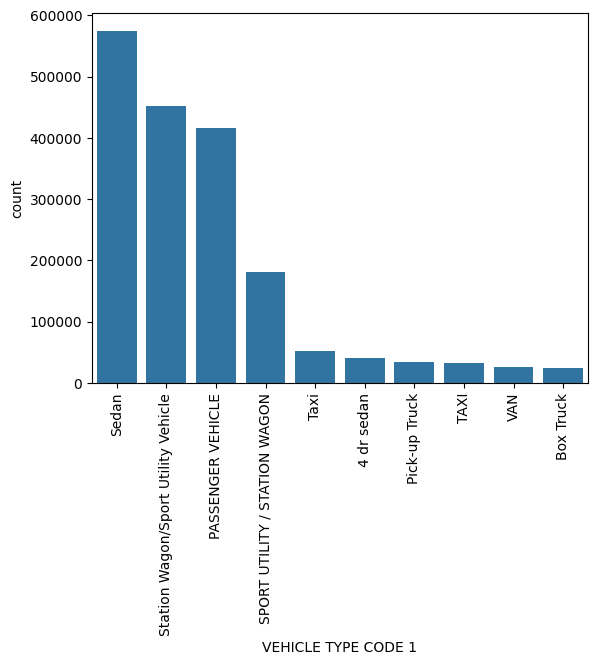

In [27]:
sns.barplot(v_type1[0:10])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'Taxi'),
  Text(6, 0, 'Bike'),
  Text(7, 0, 'Pick-up Truck'),
  Text(8, 0, '4 dr sedan'),
  Text(9, 0, 'Box Truck')])

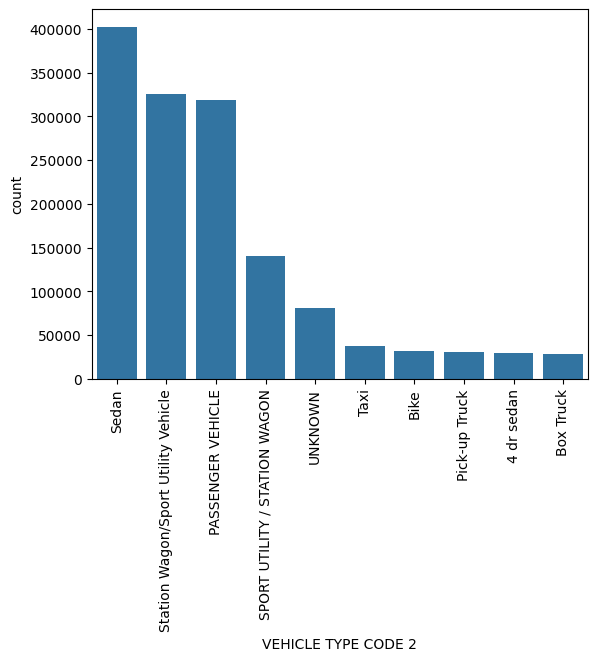

In [28]:
sns.barplot(v_type2[0:10])
plt.xticks(rotation=90)

The API application that is proposed will most likely be built using a K-Means clustering algorithm so in this case the best feature to use would be the longitude and latitude features. However some coordinates are missing so if the street names are provided for those missing rows, the values can be obtained using the OpenStreetMap Nominatim  API.

In [29]:
df_no_locs = df[df['LOCATION'].isna()]
df_street_names = df_no_locs[df_no_locs['ON STREET NAME'].notna()].shape

From the column above there are 177173 columns where the street name is known but not the location so we can input this data into the OpenStreetMap Nominatim API and get the approximate coordinates of the accidents. Since the dataset is soo large the other rows where the data is not known can simply be dropped as it may not have a ssignificant effect on the outcome of the analysis.

In [30]:
df= df.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'])

In [33]:
def replace_with_cluster_center(row):
    cluster_center = cluster_centers[row['Cluster']]
    row['Avg_LATITUDE'] = cluster_center[0]
    row['Avg_LONGITUDE'] = cluster_center[1]
    return row


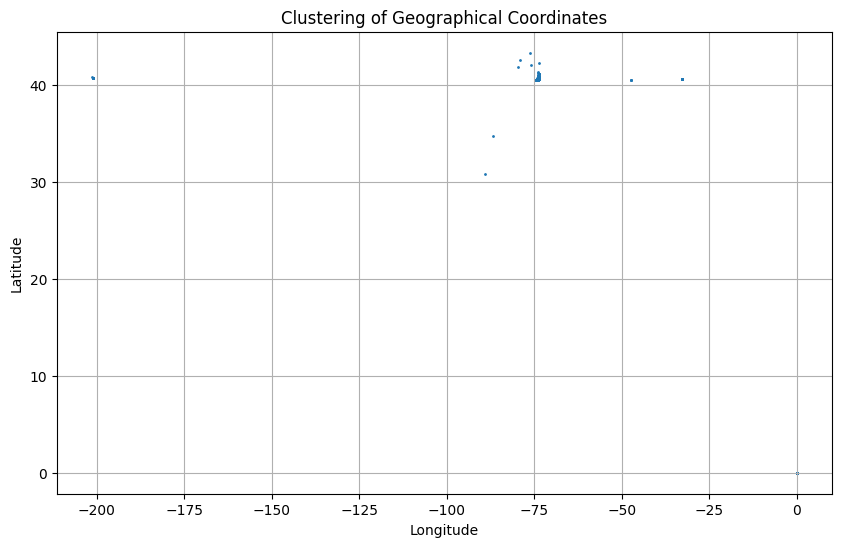

In [36]:
X = df[['LATITUDE', 'LONGITUDE']].to_numpy()

n_clusters = 500

kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
kmeans.fit(X)


df['Avg_LATITUDE'], df['Avg_LONGITUDE'] = kmeans.cluster_centers_[kmeans.labels_].T




plt.figure(figsize=(10, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], s=1)
#plt.scatter(df_with_avg_coords['Avg_LONGITUDE'], df_with_avg_coords['Avg_LATITUDE'], s=1) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Geographical Coordinates')
plt.grid(True)
plt.show()

In [ ]:
#adf_with_avg_coords

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Cluster,Avg_LATITUDE,Avg_LONGITUDE
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,0,0,Unspecified,NaN,4456314,Sedan,NaN,370,40.673893,-73.864916
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,0,0,NaN,NaN,4486609,NaN,NaN,140,40.688472,-73.916005
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,0,0,Passing Too Closely,Unspecified,4486555,Sedan,Tractor Truck Diesel,425,40.708733,-73.957761
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan,43,40.867127,-73.830706
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,0,0,Driver Inexperience,Unspecified,4487074,Sedan,NaN,322,40.668772,-73.897850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075648,03/23/2024,17:45,QUEENS,11106.0,40.760048,-73.928060,"(40.760048, -73.92806)",30 STREET,34 AVENUE,NaN,...,1,0,Failure to Yield Right-of-Way,Unspecified,4712188,Station Wagon/Sport Utility Vehicle,Sedan,258,40.766490,-73.930994
2075649,03/23/2024,5:33,BROOKLYN,11208.0,40.685696,-73.871610,"(40.685696, -73.87161)",RIDGEWOOD AVENUE,HEMLOCK STREET,NaN,...,1,0,Unsafe Speed,Unspecified,4712016,Sedan,NaN,462,40.682751,-73.873701
2075650,03/22/2024,4:00,BRONX,10452.0,40.835445,-73.923386,"(40.835445, -73.923386)",SHAKESPEARE AVENUE,JEROME AVENUE,NaN,...,0,0,Backing Unsafely,Unspecified,4712480,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,348,40.834004,-73.928209
2075651,03/23/2024,6:43,BRONX,10451.0,40.816532,-73.928220,"(40.816532, -73.92822)",GRAND CONCOURSE,EAST 144 STREET,NaN,...,1,0,Fell Asleep,NaN,4712505,Station Wagon/Sport Utility Vehicle,NaN,444,40.820494,-73.928907


In [ ]:
df_with_avg_coords['Cluster'].value_counts()

Cluster
44     9744
26     9446
419    9384
189    9085
331    9060
       ... 
46        1
27        1
12        1
52        1
169       1
Name: count, Length: 500, dtype: int64

In [ ]:
df_with_avg_coords[df_with_avg_coords['Cluster'] == 44].head(10)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Cluster,Avg_LATITUDE,Avg_LONGITUDE
79,12/08/2021,19:30,MANHATTAN,10022.0,40.761750,-73.96899,"(40.76175, -73.96899)",NaN,NaN,127 EAST 58 STREET,...,0,0,Following Too Closely,Reaction to Uninvolved Vehicle,4484852,Station Wagon/Sport Utility Vehicle,Bike,44,40.759161,-73.967759
449,09/11/2021,16:25,MANHATTAN,10022.0,40.760920,-73.96704,"(40.76092, -73.96704)",3 AVENUE,EAST 58 STREET,NaN,...,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,4455917,Taxi,Box Truck,44,40.759161,-73.967759
1209,04/16/2021,22:15,NaN,NaN,40.752445,-73.96461,"(40.752445, -73.96461)",FDR DRIVE,EAST 49 STREET,NaN,...,0,0,Driver Inattention/Distraction,Unspecified,4407867,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,44,40.759161,-73.967759
1672,04/10/2021,22:07,MANHATTAN,10022.0,40.759575,-73.96803,"(40.759575, -73.96803)",EAST 56 STREET,3 AVENUE,NaN,...,0,0,Unsafe Speed,Unspecified,4408566,Sedan,Sedan,44,40.759161,-73.967759
1729,04/17/2021,18:00,MANHATTAN,10022.0,40.756130,-73.96761,"(40.75613, -73.96761)",2 AVENUE,EAST 52 STREET,NaN,...,0,0,Passing or Lane Usage Improper,Unspecified,4408132,Taxi,Sedan,44,40.759161,-73.967759
2626,04/19/2021,6:40,MANHATTAN,10022.0,40.758633,-73.96579,"(40.758633, -73.96579)",2 AVENUE,EAST 56 STREET,NaN,...,1,0,Driver Inattention/Distraction,Unspecified,4408463,Taxi,Station Wagon/Sport Utility Vehicle,44,40.759161,-73.967759
3168,09/13/2021,0:00,MANHATTAN,10022.0,40.754480,-73.96756,"(40.75448, -73.96756)",NaN,NaN,337 EAST 50 STREET,...,0,0,Passing or Lane Usage Improper,Unspecified,4457283,Sedan,NaN,44,40.759161,-73.967759
3779,09/12/2021,22:34,MANHATTAN,10022.0,40.761550,-73.96659,"(40.76155, -73.96659)",3 AVENUE,EAST 59 STREET,NaN,...,0,0,Passing Too Closely,Passing Too Closely,4457678,Station Wagon/Sport Utility Vehicle,Taxi,44,40.759161,-73.967759
4406,04/23/2021,0:26,MANHATTAN,10022.0,40.761550,-73.96659,"(40.76155, -73.96659)",3 AVENUE,EAST 59 STREET,NaN,...,0,0,Turning Improperly,Passing or Lane Usage Improper,4409895,Station Wagon/Sport Utility Vehicle,Sedan,44,40.759161,-73.967759
4625,04/19/2021,23:35,MANHATTAN,10017.0,40.753242,-73.96662,"(40.753242, -73.96662)",1 AVENUE,EAST 49 STREET,NaN,...,0,0,Driver Inattention/Distraction,Unspecified,4409899,Station Wagon/Sport Utility Vehicle,E-Bike,44,40.759161,-73.967759
